Edoardo Merli edoardo.merli@studio.unibo.it

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.model_selection import train_test_split
from sklearn.metrics.cluster import pair_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

random_state = 42

1. load the data into a dataframe df, show its size and head, eliminate
the rows containing null values and show the number of remaining
rows

In [2]:
df = pd.read_csv('country_stats.csv')
print(df.shape)
df.head()

(242, 8)


,Country Name,GDP at market prices (constant 2005 US$),GDP at market prices (current US$),GDP per capita (constant 2005 US$),GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),"Population, total"
0,Afghanistan,1.593680e+10,1.593680e+10,553.300289,553.300289,4.0,2.812617,28803167.0
1,Albania,1.192695e+10,1.192695e+10,4094.358832,4094.358832,45.0,-0.496462,2913021.0
2,Algeria,1.612073e+11,1.612073e+11,4463.394675,4463.394675,12.5,1.821358,36117637.0
3,American Samoa,5.760000e+08,5.760000e+08,10352.822762,10352.822762,NaN,-1.054862,55637.0
4,Andorra,3.355695e+09,3.355695e+09,39736.354063,39736.354063,81.0,-0.015393,84449.0


In [3]:
df = df.dropna()
print(df.shape)

(221, 8)


2. produce a pairplot of the numeric columns of df and comment
relevant situations

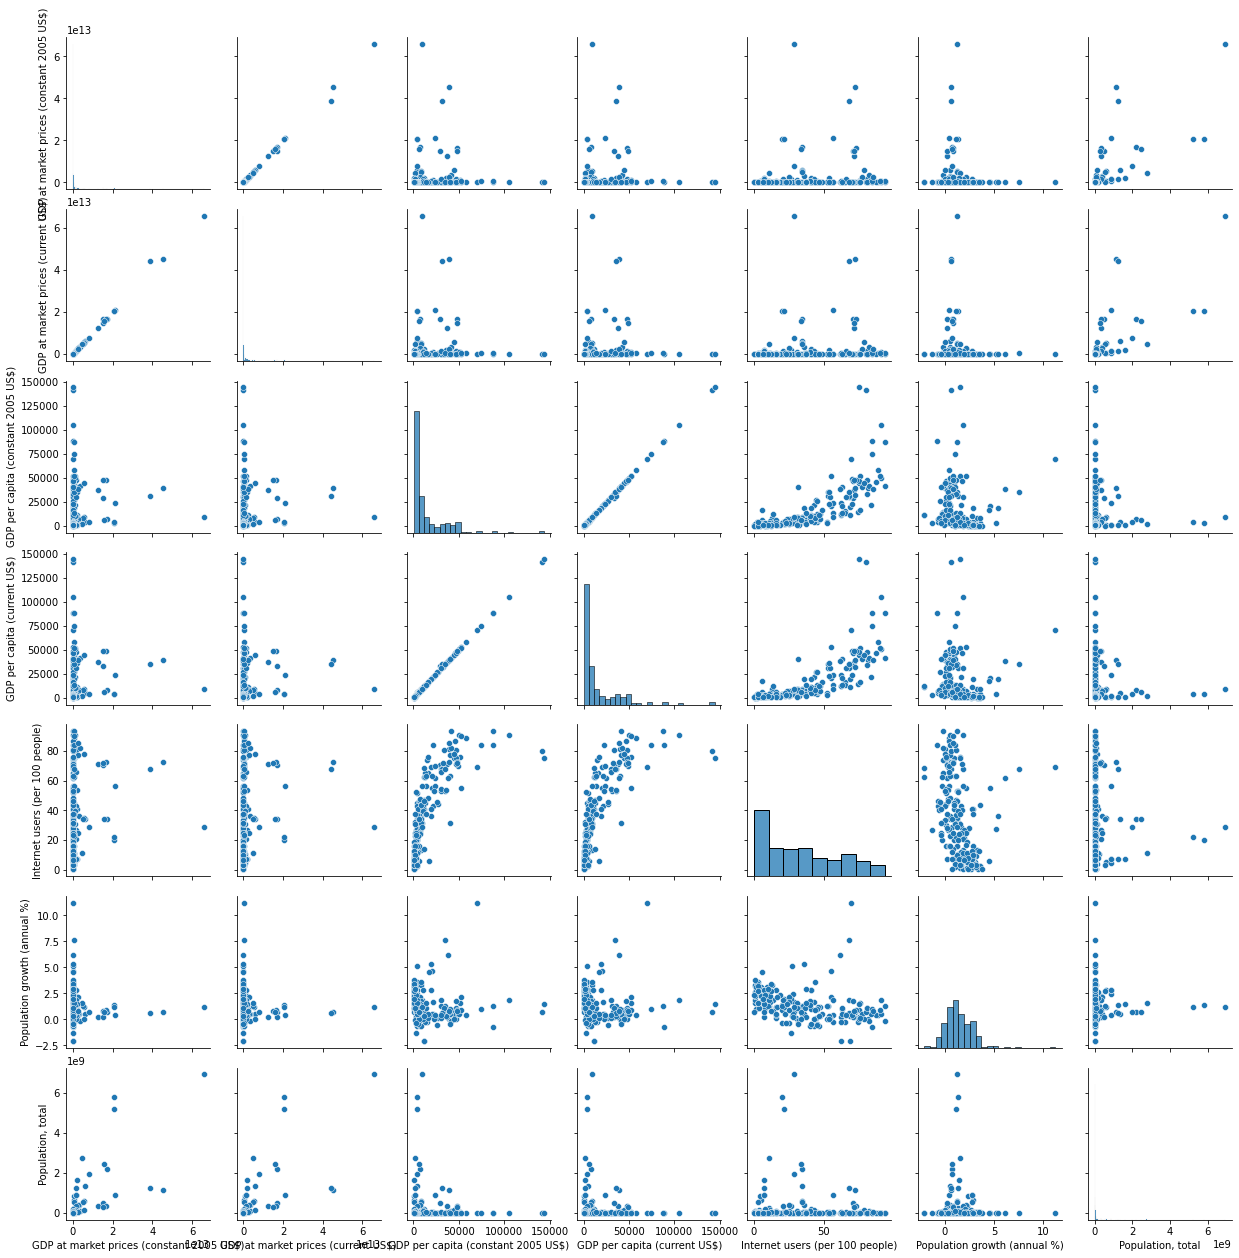

In [4]:
sns.pairplot(df);

Distributions skewed, very high correlation btw 1,2 and 3,4

3. Produce a box plot of the numeric columns of df and comment
relevant situations

<AxesSubplot:>

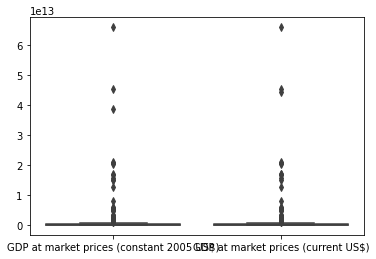

In [5]:
sns.boxplot(data=df[[
    'GDP at market prices (constant 2005 US$)',
    'GDP at market prices (current US$)'
]])


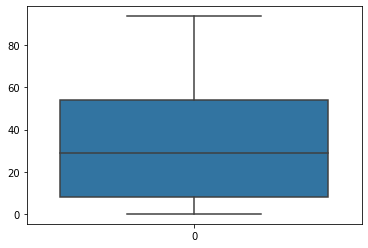

In [14]:
sns.boxplot(data=df.iloc[:,3]);

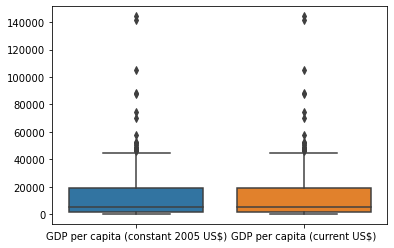

In [7]:
sns.boxplot(data=df.iloc[:,3:-3]);

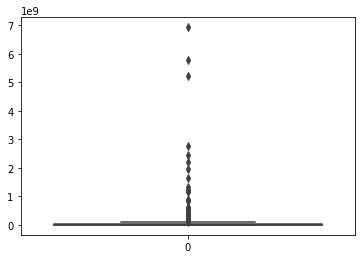

In [19]:
sns.boxplot(data=df.iloc[:,5]);

4. Produce the correlation matrix of the data and eliminate the
redundant attributes, if it is adequate

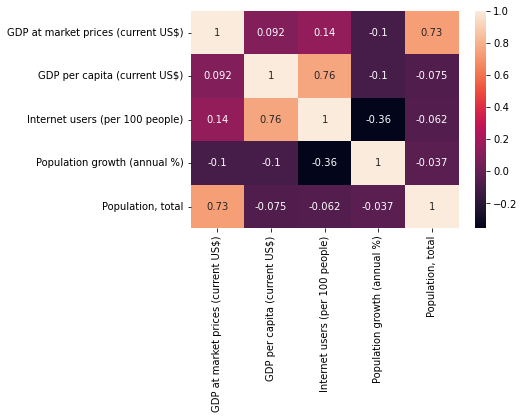

In [21]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [11]:
df = df.drop(['GDP at market prices (constant 2005 US$)', 'GDP per capita (constant 2005 US$)'], axis=1)
df.head()

,Country Name,GDP at market prices (current US$),GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),"Population, total"
0,Afghanistan,1.593680e+10,553.300289,4.0,2.812617,28803167.0
1,Albania,1.192695e+10,4094.358832,45.0,-0.496462,2913021.0
2,Algeria,1.612073e+11,4463.394675,12.5,1.821358,36117637.0
4,Andorra,3.355695e+09,39736.354063,81.0,-0.015393,84449.0
5,Angola,8.247091e+10,3529.053482,2.8,3.570099,23369131.0


5. Split the reduced data: store the first column in a vector keys and the
others in a matrix X

In [12]:
target = 'Country Name'
y = df[target]
X = df.drop(target, axis=1)

6.

In [22]:
distorsions = []
silhouette_scores = []

k_range = list(range(2, 16))
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=random_state, init="k-means++", n_init=10, max_iter=300)
    y_km = kmeans.fit_predict(X)
    distorsions.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, y_km))

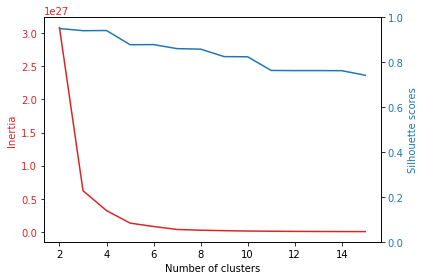

In [26]:
fig, ax1 = plt.subplots()

color1 = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color1)
ax1.plot(k_range, distorsions, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()

color2 = 'tab:blue'
ax2.set_ylabel('Silhouette scores', color=color2)
ax2.plot(k_range, silhouette_scores, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, 1)

fig.tight_layout()
plt.show()

In [27]:
best_k = 3

7. Fit the clustering scheme to y, then produce the silhouette plot using
the function plot_silhouette contained in the attached file

In [29]:
kmeans = KMeans(n_clusters=best_k, random_state=random_state, init="k-means++", n_init=10, max_iter=300)
y_km = kmeans.fit_predict(X)
silhouette_vals = silhouette_samples(X, y_km)

In [38]:
from matplotlib import cm
import numpy as np

def plot_silhouette(silhouette_vals, y, 
 					colors = cm.tab10,
                    plot_noise = False
					):
    """
    Plotting silhouette scores for the individual samples of a labelled data set.
    The scores will be grouped according to labels and sorted in descending order.
    The bars are proportional to the score and the color is determined by the label.
    
    silhouette_vals: the silhouette values of the samples
    y:               the labels of the samples
    plot_noise:      boolean, assumes the noise to be labeled with a negative integer
    
    """
    cluster_labels = np.unique(y)
    n_clusters = len(cluster_labels)
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels): # generate pairs index, cluster_label
        if (c < 0 and plot_noise == False):
            continue
        c_silhouette_vals = silhouette_vals[y==c] # extracts records with the current cluster label
        c_silhouette_vals.sort() # sort the silhouette vals for the current class
        y_ax_upper += len(c_silhouette_vals)
        color = colors(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
                edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)
        c_silhouette_avg = np.mean(c_silhouette_vals)
        plt.axvline(c_silhouette_avg, #ymin = y_ax_lower, ymax = y_ax_upper,
                    color=color, linestyle="-.")

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="black", linestyle=":") 
    plt.yticks(yticks, cluster_labels)# + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    # plt.savefig('./figures/silhouette.png', dpi=300)
    plt.show()

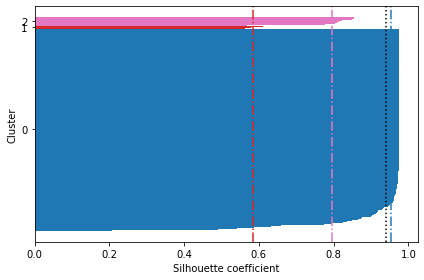

In [39]:
plot_silhouette(silhouette_vals=silhouette_vals, y=y_km)

In [41]:
for c in X.columns:
    if X[c].min() <= 0:
        continue
    X[c] = np.log(X[c])

In [42]:
X.head()

,GDP at market prices (current US$),GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),"Population, total"
0,23.491897,6.315901,1.386294,2.812617,17.175996
1,23.202067,8.317365,3.806662,-0.496462,14.884701
2,25.805957,8.403665,2.525729,1.821358,17.402292
4,21.933925,10.590022,4.394449,-0.015393,11.343903
5,25.135711,8.168785,1.029619,3.570099,16.966927


In [44]:
distorsions = []
silhouette_scores = []

k_range = list(range(2, 16))
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=random_state, init="k-means++", n_init=10, max_iter=300)
    y_km = kmeans.fit_predict(X)
    distorsions.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, y_km))

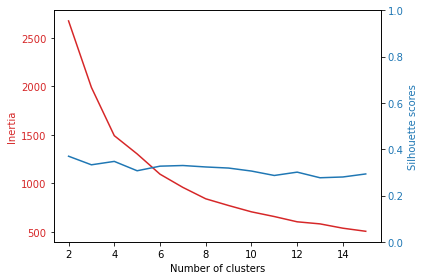

In [45]:
fig, ax1 = plt.subplots()

color1 = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color1)
ax1.plot(k_range, distorsions, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()

color2 = 'tab:blue'
ax2.set_ylabel('Silhouette scores', color=color2)
ax2.plot(k_range, silhouette_scores, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, 1)

fig.tight_layout()
plt.show()

In [46]:
best_k = 4

In [47]:
kmeans = KMeans(n_clusters=best_k, random_state=random_state, init="k-means++", n_init=10, max_iter=300)
y_km = kmeans.fit_predict(X)
silhouette_vals = silhouette_samples(X, y_km)

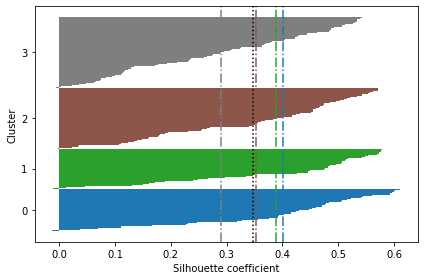

In [49]:
plot_silhouette(silhouette_vals=silhouette_vals, y=y_km)

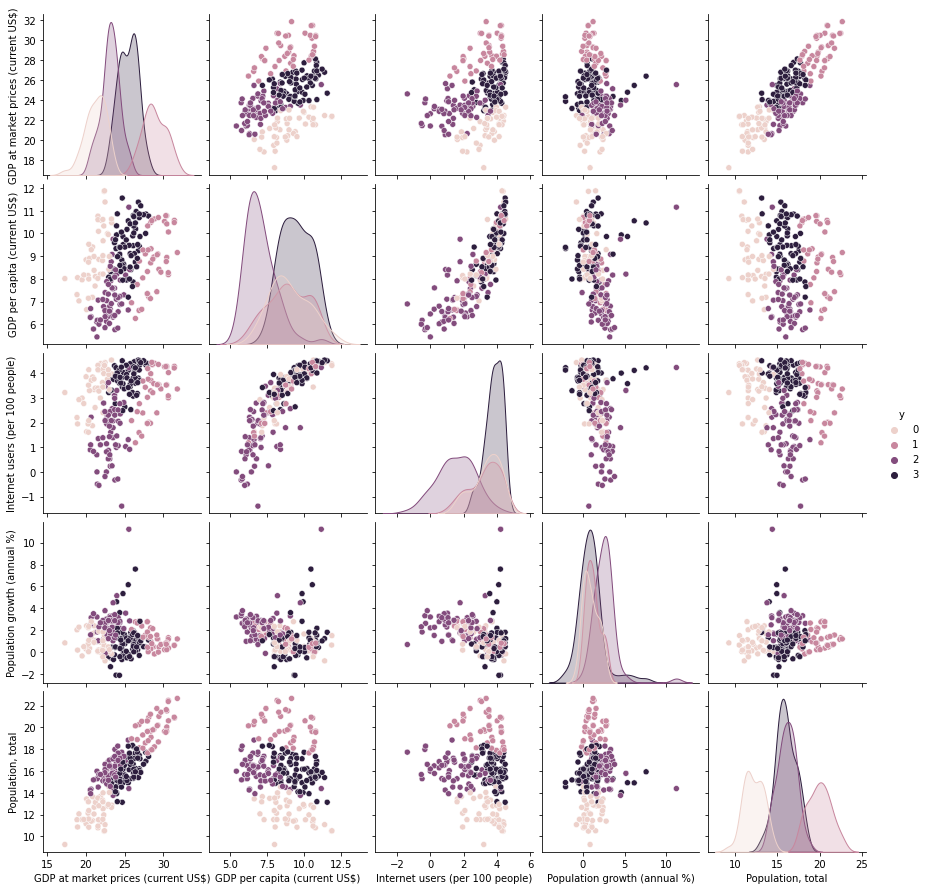

In [50]:
X['y'] = y_km
sns.pairplot(X, hue='y')